In [1]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

In [2]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [3]:
worksheet = gc.open('ex1dl').sheet1

rows = worksheet.get_all_values()

df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'INPUT':'float'})
df = df.astype({'OUTPUT':'float'})

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler



In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
from google.colab import auth
import gspread
from google.auth import default

In [ ]:
# dataset1 = pd.read_csv('data1.csv')


In [7]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [8]:
worksheet = gc.open('ex1dl').sheet1
data = worksheet.get_all_values()

In [9]:
dataset1 = pd.DataFrame(data[1:], columns=data[0])
dataset1 = dataset1.astype({'INPUT':'float'})
dataset1 = dataset1.astype({'OUTPUT':'float'})


In [10]:
dataset1.head()



,INPUT,OUTPUT
0,1.0,51.0
1,2.0,52.0
2,3.0,53.0
3,4.0,54.0
4,5.0,55.0


In [11]:
X = dataset1[['INPUT']].values
y = dataset1[['OUTPUT']].values

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)


In [14]:
Scaler = MinMaxScaler()


In [15]:
Scaler.fit(X_train)


MinMaxScaler()

In [16]:
X_train1 = Scaler.transform(X_train)


In [20]:
ex1_model = Sequential([
    Dense(units = 3, activation = 'relu', input_shape=[1]),
    Dense(units = 2, activation = 'relu'),
    Dense(units = 1)
    ])


In [22]:
ex1_model.compile(optimizer = 'rmsprop', loss = 'mse')

In [24]:
ex1_model.fit(X_train1,y_train,epochs = 5000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 8ms/step - loss: 20.5581
Epoch 2502/5000
1/1 [==============================] - 0s 8ms/step - loss: 20.4958
Epoch 2503/5000
1/1 [==============================] - 0s 9ms/step - loss: 20.4335
Epoch 2504/5000
1/1 [==============================] - 0s 8ms/step - loss: 20.3713
Epoch 2505/5000
1/1 [==============================] - 0s 10ms/step - loss: 20.3093
Epoch 2506/5000
1/1 [==============================] - 0s 16ms/step - loss: 20.2474
Epoch 2507/5000
1/1 [==============================] - 0s 16ms/step - loss: 20.1856
Epoch 2508/5000
1/1 [==============================] - 0s 9ms/step - loss: 20.1239
Epoch 2509/5000
1/1 [==============================] - 0s 10ms/step - loss: 20.0624
Epoch 2510/5000
1/1 [==============================] - 0s 9ms/step - loss: 20.0009
Epoch 2511/5000
1/1 [==============================] - 0s 9ms/step - loss: 19.9395
Epoch 2512/5000
1/1 [===========================

In [27]:
ex1_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 6         
                                                                 
 dense_1 (Dense)             (None, 2)                 8         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 17 (68.00 Byte)
Trainable params: 17 (68.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
loss_df = pd.DataFrame(ex1_model.history.history)


<Axes: >

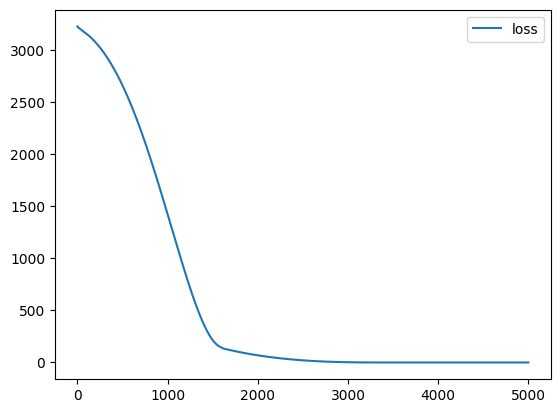

In [26]:
loss_df.plot()


In [28]:
X_test1 = Scaler.transform(X_test)


In [29]:
ex1_model.evaluate(X_test1,y_test)


1/1 [==============================] - 0s 119ms/step - loss: 0.0069


0.006874304264783859

In [30]:
X_n1 = [[30]]


In [31]:
X_n1_1 = Scaler.transform(X_n1)


In [33]:
ex1_model.predict(X_n1_1)


1/1 [==============================] - 0s 132ms/step


array([[80.07241]], dtype=float32)